<a href="https://colab.research.google.com/github/fatisa2000/ml_project/blob/main/Image_Super_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align=center>

<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Super Resolution using Autoencoder
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = Stu. No. 1
            <br />
            Name = ...   
            <br />
            Last_Name = ...
        </div>
        <div class="column">
        <br />
            student_number = Stu. No. 2
            <br />
            Name = ...   
            <br />
            Last_Name = ...
        </div>
    </font>
    </div>


name:fateme                     
last name:salehin                                                     
student number:97101961                                                                                 
 i did project alone



1. Download the "image super resolution (from unsplash)" dataset and split it's validation set to new validation set and test set.
2. Design and train an AutoEncoder using `PyTorch` (not `TensorFlow`) on the dataset to enhance the resolution of images from low resolution to high resolution.
3. plot learning curve and visualize low resolution images of test set, their corresponding high resolution images and their reconstructed versions side by side.

# Import Necessary Libraries

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatemesalehin","key":"e2ffa232dc9a7eab13f24d57076b67dd"}'}

In [ ]:
!pip install kaggle
#--------------------
!mkdir ~/.kaggle
#--------------------
! cp kaggle.json ~/.kaggle/
#--------------------
!chmod 600 ~/.kaggle/kaggle.json
#--------------------
! kaggle datasets download quadeer15sh/image-super-resolution-from-unsplash
#--------------------
!unzip /content/image-super-resolution-from-unsplash

Streaming output truncated to the last 5000 lines.
  inflating: Image Super Resolution - Unsplash/high res/1013.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1014.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1015.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1016.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1017.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1018.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1019.jpg  
  inflating: Image Super Resolution - Unsplash/high res/102.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1020.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1021.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1022.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1023.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1024.jpg  
  inflating: Image Super Resolution - Unsplash/high res/1025.jpg  
  inflating:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import requests
from sklearn.model_selection import train_test_split
import numpy as np
import json
import csv
from google.colab import files
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor, Resize, Grayscale
from torchvision.transforms.functional import to_grayscale
from torchvision.transforms import functional as F
from torchvision.datasets import ImageFolder
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Load Dataset and Prepare It

In [ ]:
from PIL import Image
import os
dataset_dir='/content/Image Super Resolution - Unsplash/low res'
#image_path = dataset_dir + '/1002_4.jpg'
#image = Image.open(image_path)
#image.show()
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        image_path = os.path.join(dataset_dir, filename)
        image = Image.open(image_path)
        #image.show()
image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]
dataset_dir1='/content/Image Super Resolution - Unsplash/high res'
image_files1 = [f for f in os.listdir(dataset_dir1) if f.endswith('.jpg')]


In [ ]:
torch.manual_seed(42)

dataset_path = '/content/Image Super Resolution - Unsplash'


data_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


dataset = ImageFolder(dataset_path, transform=data_transforms)

val_split = 0.2
test_split = 0.1
dataset_size = len(dataset)
val_size = int(val_split * dataset_size)
test_size = int(test_split * dataset_size)
train_size = dataset_size - val_size - test_size

train_dataset, old_val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])
new_val_size = int(val_split * len(old_val_dataset))
new_test_size = len(old_val_dataset) - new_val_size
new_val_dataset, new_test_dataset = torch.utils.data.random_split(old_val_dataset, [new_val_size, new_test_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(new_val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)



# Define Your Model
torch neural network model

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Fit The Model
Also Define optimizer, Criterion and other parameters

In [ ]:
model = AutoEncoder()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
train_losses = []
val_losses = []


for epoch in range(num_epochs):
    train_loss = 0.0


    model.train()

    for images, _ in train_loader:

        images = images.to(device)


        optimizer.zero_grad()


        outputs = model(images)

        loss = criterion(outputs, images)


        loss.backward()


        optimizer.step()


        train_loss += loss.item() * images.size(0)


    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()

    val_loss = 0.0


    with torch.no_grad():
        for images, _ in val_loader:

            images = images.to(device)


            outputs = model(images)

            loss = criterion(outputs, images)


            val_loss += loss.item() * images.size(0)


    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)


    print(f"Epoch [{epoch+1}/{num_epochs}] - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f}")


Epoch [1/10] - Training Loss: 0.3121 - Validation Loss: 0.2458
Epoch [2/10] - Training Loss: 0.2730 - Validation Loss: 0.2431
Epoch [3/10] - Training Loss: 0.2717 - Validation Loss: 0.2423
Epoch [4/10] - Training Loss: 0.2710 - Validation Loss: 0.2420
Epoch [5/10] - Training Loss: 0.2707 - Validation Loss: 0.2415
Epoch [6/10] - Training Loss: 0.2704 - Validation Loss: 0.2412
Epoch [7/10] - Training Loss: 0.2702 - Validation Loss: 0.2411
Epoch [8/10] - Training Loss: 0.2703 - Validation Loss: 0.2411
Epoch [9/10] - Training Loss: 0.2699 - Validation Loss: 0.2407
Epoch [10/10] - Training Loss: 0.2698 - Validation Loss: 0.2407


# Plot The Results

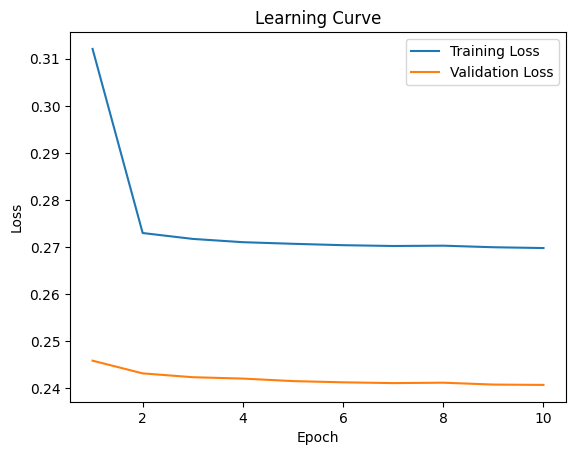

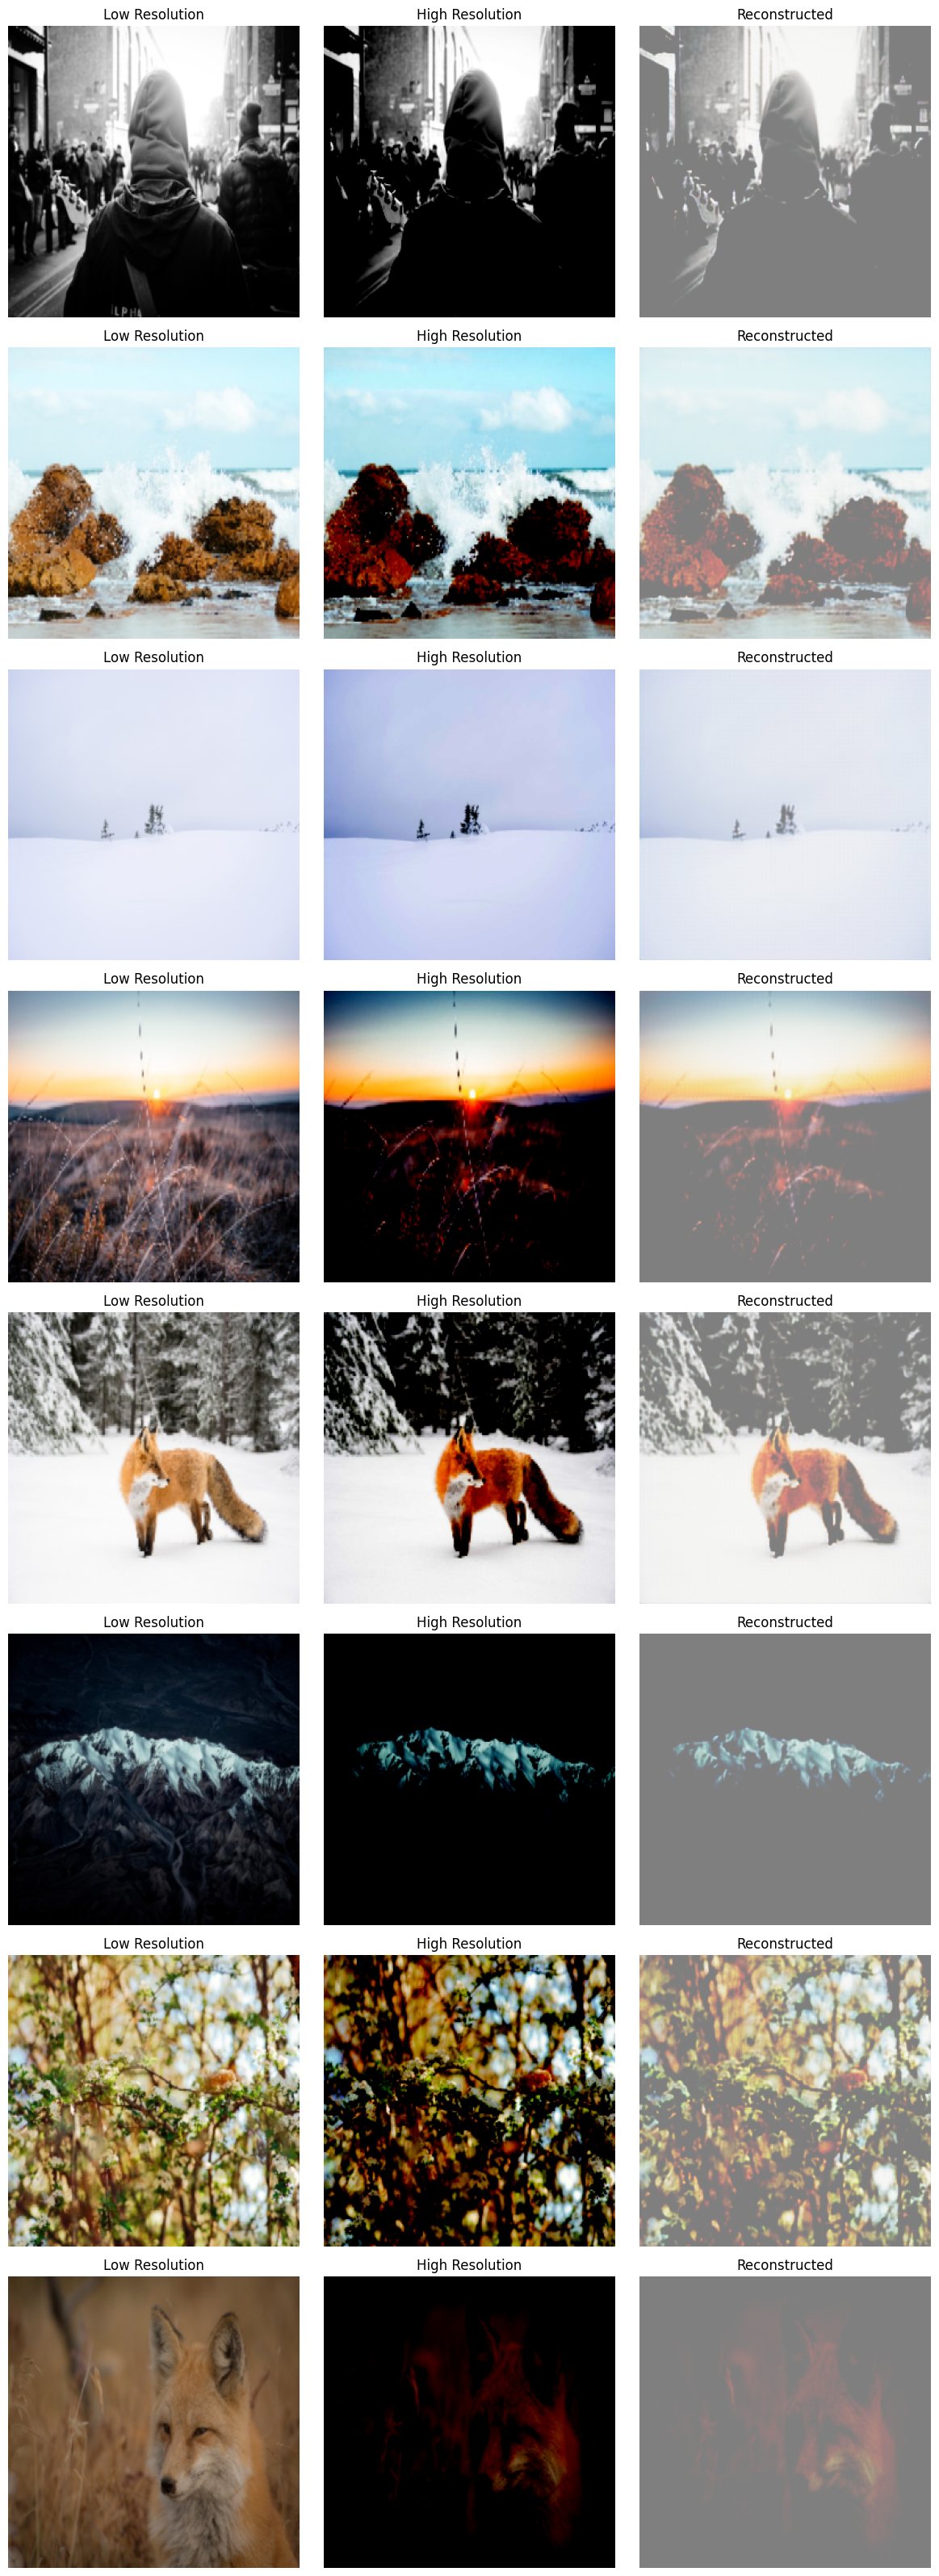

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()

batch_size = 8
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()


test_images, _ = next(iter(test_loader))
test_images = test_images.to(device)

reconstructed_images = model(test_images)


denormalize = transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2])
test_images = denormalize(test_images.cpu())
reconstructed_images = denormalize(reconstructed_images.detach().cpu())


test_images = test_images.permute(0, 2, 3, 1).numpy()
reconstructed_images = reconstructed_images.permute(0, 2, 3, 1).numpy()


fig, axs = plt.subplots(len(test_images), 3, figsize=(12, 4 * len(test_images)))

for i in range(len(test_images)):

    axs[i, 0].imshow(test_images[i])
    axs[i, 0].axis('off')
    axs[i, 0].set_title('Low Resolution')


    high_res_image, _ = test_dataset[i]
    high_res_image = high_res_image.permute(1, 2, 0).numpy()
    axs[i, 1].imshow(high_res_image)
    axs[i, 1].axis('off')
    axs[i, 1].set_title('High Resolution')


    axs[i, 2].imshow(reconstructed_images[i])
    axs[i, 2].axis('off')
    axs[i, 2].set_title('Reconstructed')

plt.tight_layout()
plt.show()
